# Recitation 7: Root Finding 

## Bisection, Newtons Algorithm 

In [10]:
using Plots
using LinearAlgebra
gr()

Plots.GRBackend()

## Bisection Algorithm 
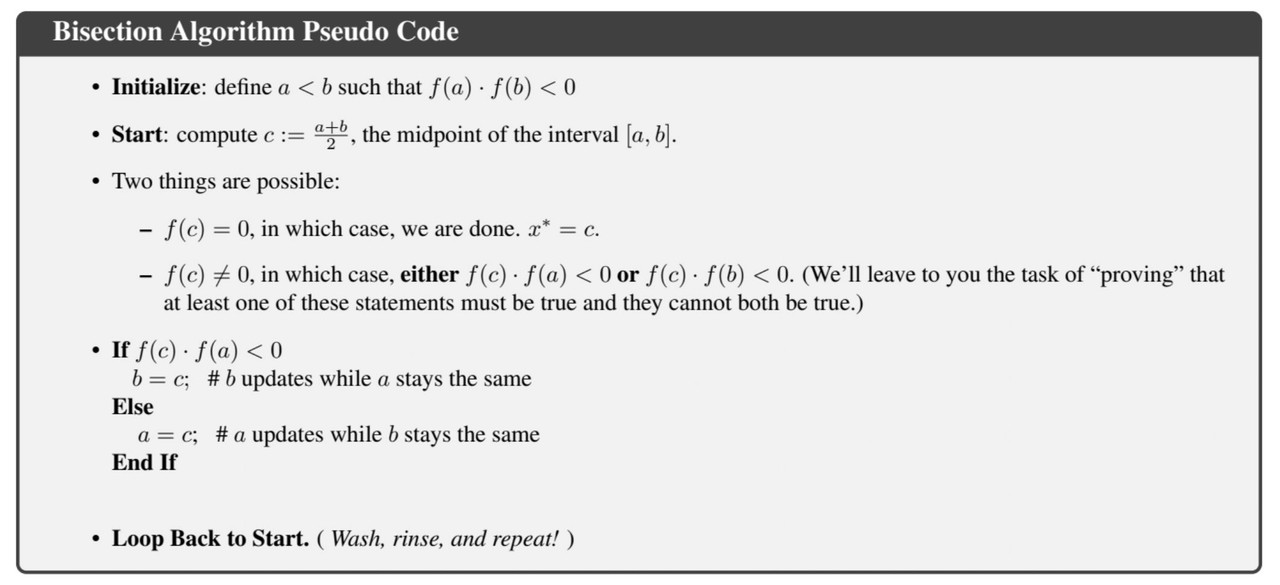

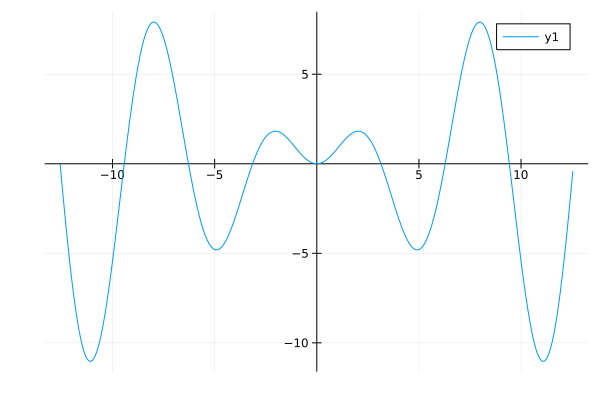

In [11]:
f(x) = x*sin(x)

x = -4*pi:0.1:4*pi;

plot(x,f, framestyle = :origin)

### Question: What should your a, b be?

### Answer: 

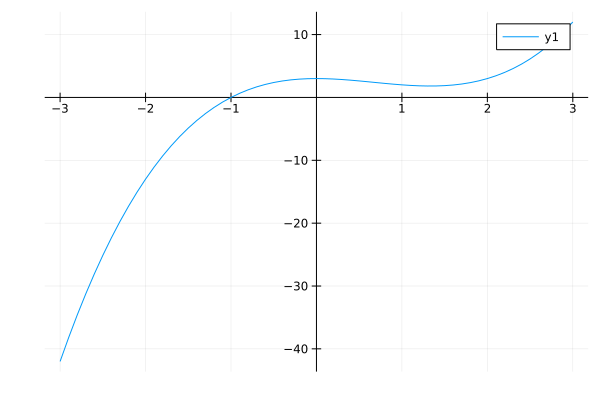

In [12]:
# Single root, easier example 

f(x) = x.^3-2*x.^2+3

x = -3:0.1:3;

plot(x,f, framestyle = :origin)

In [13]:
# a = 
# b =
gr()
plot();


### Modified Bisection Algorithm 

In [14]:
# a =
# b =
# Check if no roots



## Newtons algorithms 

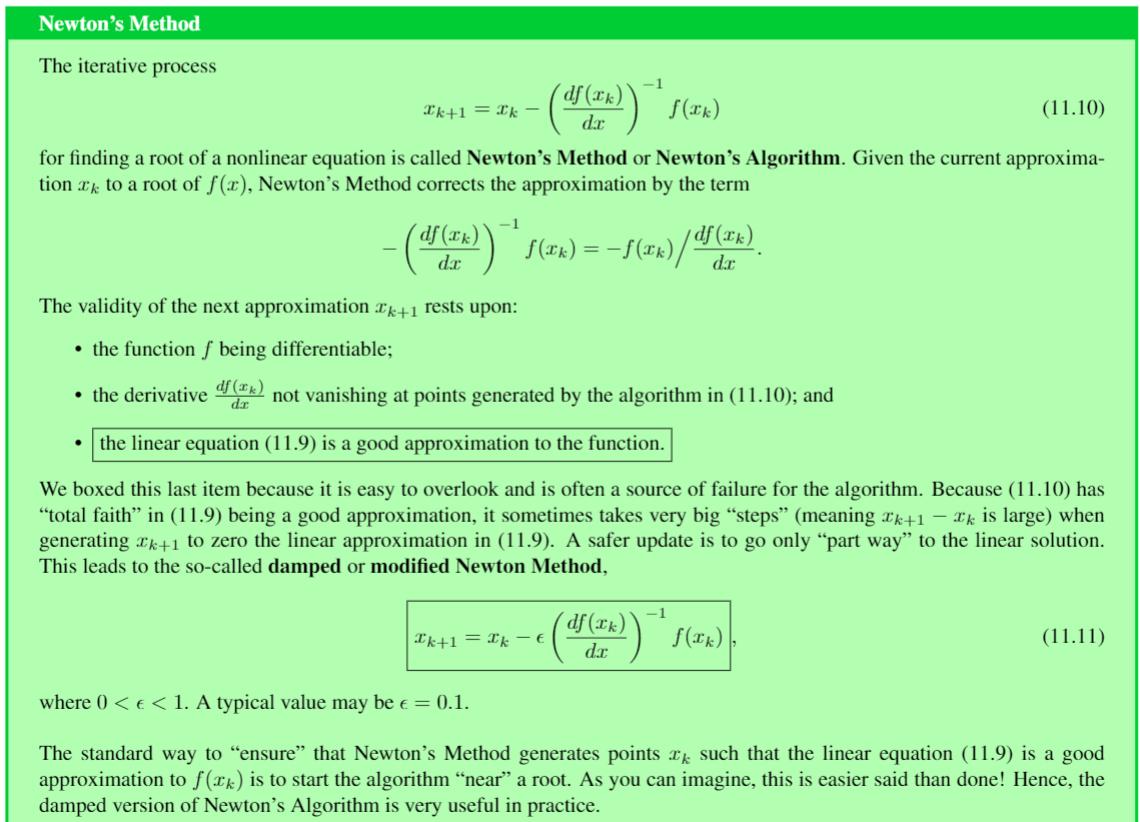

In [15]:
f(x) = x.^3-2*x.^2+3
df(x) = 3*x.^2-4*x
x0 = -1.5;
solution = [];
x = x0

-1.5

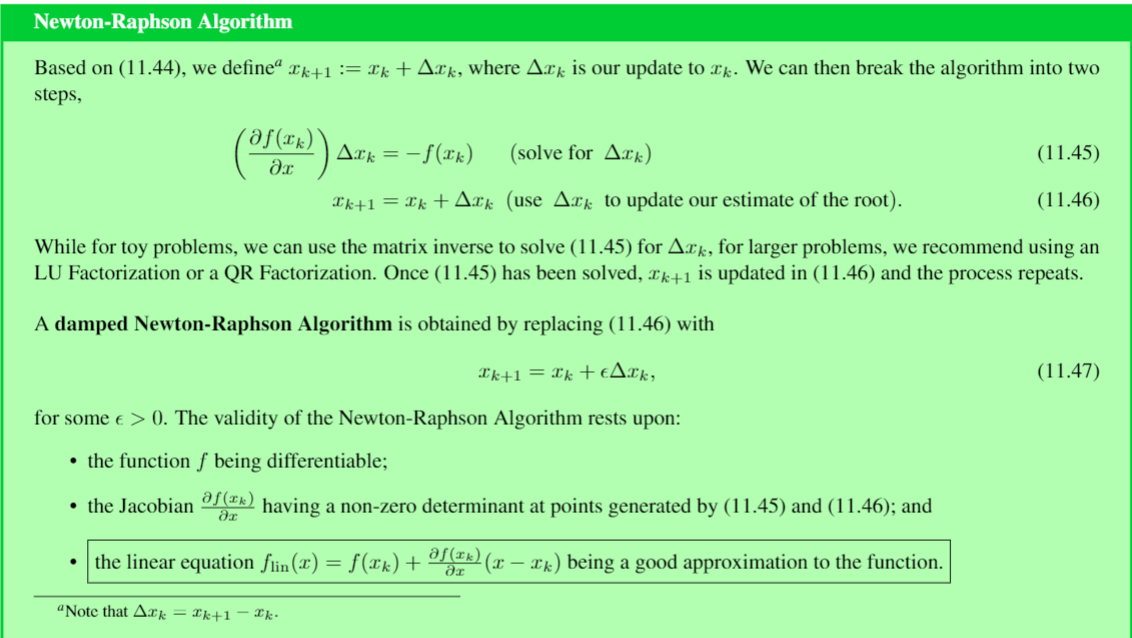

In [16]:
F(x) = [3*x[1]-cos(x[2]*x[3])-3/2; 4*x[1]^2-625*x[2]^2+2*x[3]-1; 20*x[3]+exp(-x[1]*x[2])+9]

F (generic function with 1 method)

In [17]:
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end

backwardsub (generic function with 1 method)

In [18]:
x0 = [1,1,1];
h =0.1;
F(x0)

3-element Vector{Float64}:
    0.9596976941318602
 -620.0
   29.367879441171443

In [19]:
function calc_jacobian(F,x0,h)
    n = size(x0,1);
    m = size(F(x0),1);
    jacobian = zeros(m,n);
    my_I = zeros(n,n)+I;
    for i = 1:n
        jacobian[:,i] = (F(x0+h*my_I[:,i])-F(x0-h*my_I[:,i]))/2*h;
    end
    return jacobian
end


calc_jacobian (generic function with 1 method)

In [20]:
analytical_jacobian(x) = [3 x[3]*sin(x[2]*x[3]) x[2]*sin(x[2]*x[3]); 8*x[1] -1250*x[2] 2; -x[2]*exp(-x[1]*x[2]) -x[1]*exp(-x[1]*x[2]) 20];

In [21]:
@show jacobian = calc_jacobian(F,x0,h)
@show analytical_jacobian(x0)

# CALCULATE ONE STEP OF SOLUTION

# delta = ?? 


jacobian = calc_jacobian(F, x0, h) = [0.030000000000000006 0.008400692342254356 0.008400692342254356; 0.08000000000000114 -12.500000000000004 0.02000000000000455; -0.0036849288021258532 -0.0036849288021258532 0.2]
analytical_jacobian(x0) = [3.0 0.8414709848078965 0.8414709848078965; 8.0 -1250.0 2.0; -0.36787944117144233 -0.36787944117144233 20.0]
delta = backwardsub(qr_jacobian.R, -((qr_jacobian.Q)') * F(x0)) = [23.178875852167568, -49.687379685669754, -147.3278069522438]
x = x0 + 0.01delta = [1.2317887585216756, 0.5031262031433025, -0.4732780695224381]
F(x) = [1.223582805924532, -154.08732713743566, 0.07252013223400233]


3-element Vector{Float64}:
    1.223582805924532
 -154.08732713743566
    0.07252013223400233

In [24]:
# Find the solution using Newton Raphson
solution = [];
x = x0;
@show F(x)
for i = 1:10000
    if(isapprox(F(x),zeros(size(x)), atol = 0.01))
        solution = x;
        @show i
        break;
    else
        ## your code here! 
        # x = ?? 
        @show F(x)
    end
end

F(x) = [0.9596976941318602, -620.0, 29.367879441171443]
F(x) = [1.223582805924571, -154.08732713743564, 0.0725201322339899]
F(x) = [0.005389686014105166, -38.838063894242694, -0.0023296951248834574]
F(x) = [0.0017273472522645328, -9.51744386548196, 0.004391446235418428]
F(x) = [0.0004151371723086772, -2.1996225863897294, 0.001066587126450358]
F(x) = [7.861113295293265e-5, -0.40629759088985373, 0.00019149697094178464]
F(x) = [6.7961803780214325e-6, -0.03486416450160501, 1.1771067358168352e-5]
F(x) = [7.060977447181926e-8, -0.0003740953025541671, -5.224777375190115e-7]
i = 8
